In [2]:
# Import pakietów
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
columns = ['Wine', 
           'Alcohol',
           'Malic acid', 
           'Ash', 
           'Alcalinity of ash',
           'Magnesium', 
           'Total phenols', 
           'Flavanoids', 
           'Nonflavanoid phenols', 
           'Proanthocyanins', 
           'Color intensity', 
           'Hue',
           'OD280/OD315', 
           'Proline']

In [19]:
# Załadowanie danych
df = pd.read_csv('wine.data', names=columns, sep=',')

In [20]:
df

,Wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [21]:
# Pomijamy kolumnę Wine - daje ona jednoznaczne informacje o winie. Ale zobaczmy, ile rodzajów jest "oryginalnie" w danych

In [22]:
df['Wine'].value_counts()

2    71
1    59
3    48
Name: Wine, dtype: int64

In [23]:
# Domyślnie są 3 rodzaje - ciekawe czy w przypadku klasteryzacji dla k=3 otrzymamy najlepsze wyniki Calinski-Harabasz-index

In [24]:
# Usuwamy kolumnę Wine
df = df.drop('Wine', axis = 1)

In [25]:
df

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [26]:
# Sprawdzamy typy kolumn i braki w danych.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Alcalinity of ash     178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280/OD315           178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [28]:
df.isna().sum()

Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
OD280/OD315             0
Proline                 0
dtype: int64

In [29]:
# Nie mamy braków w danych, wszystkie kolumny zawierają dane numeryczne, a więc są gotowe do analizy.

In [30]:
# Wyznaczamy statystyki opisowe ramki danych.

In [31]:
df.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [32]:
# Można zauwazyć, że poszczególne kolumny posiadają różne zakresy - wykonajmy skalowanie min - max

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()

In [35]:
# Dokonajmy skalowania (zakresy <0, 1>)

In [36]:
df_scaled = scaler.fit_transform(df)

In [37]:
df_scaled

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [38]:
# Dane zostały poprawnie przeskalowane

In [39]:
# Algorytm k-średnich (K-Means)

In [42]:
from sklearn.cluster import KMeans

In [40]:
# Sprawdzenie działania dla maksymalnie 2, 3, 4, 5 klastrów. Dodajemy do listy indeksy Calinski-Harabasz-index

In [58]:
idx_Calinski_Harabasz = []

In [59]:
from sklearn.metrics import calinski_harabasz_score

In [60]:
clusters_analyse = [2, 3, 4, 5]

In [61]:
for k in clusters_analyse:
    K_mean = KMeans(n_clusters=k, random_state=312)
    K_mean.fit(df_scaled)
    Kmeans_labels = K_mean.labels_
    CHscore = calinski_harabasz_score(df_scaled, Kmeans_labels)
    idx_Calinski_Harabasz.append(CHscore)

Text(0.5, 1.0, 'Calinski_Harabasz index by clusters')

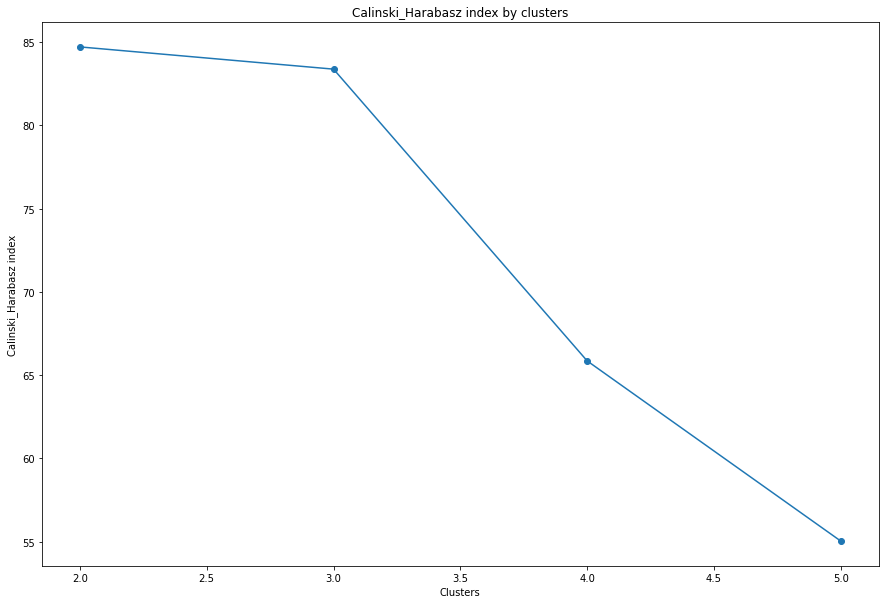

In [62]:
# Zwizualizujmy Calinski_Harabasz index, aby wybrać najlepsze k
plt.figure(figsize=(15, 10))
plt.plot(clusters_analyse, idx_Calinski_Harabasz, '-o')
plt.xlabel('Clusters')
plt.ylabel('Calinski_Harabasz index')
plt.title('Calinski_Harabasz index by clusters')

In [63]:
# Najbardziej optymalna liczba klastrów to 2. Okazuje się, że jest ona inna, niż liczba w kolumnie Wines (3).

In [65]:
# Utwórzmy więc model z 2 klastrami i dokonajmy niewielkiej analizy
K_mean = KMeans(n_clusters=2)
K_mean.fit(df_scaled)

KMeans(n_clusters=2)

In [66]:
# Analiza klastrów

In [67]:
labels = pd.DataFrame(K_mean.labels_)
labeledData = pd.concat((df, labels), axis = 1)
labeledData = labeledData.rename({0:'labels'},axis=1)

In [68]:
labeledData

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline,labels
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [69]:
# Mamy 2 klastry - każdy przechowuje dane o pewnej liczności
labeledData['labels'].value_counts()

0    108
1     70
Name: labels, dtype: int64

In [70]:
# Widać, że dużo częsciej występuje grupa 0.

In [71]:
# W celu porównania danych z każdego z klastrów wypiszemy statystyki i zapoznamy się z nimi
cluster_desc = []
for cluster_no in range(2):
    print("Cluster "+str(cluster_no))
    desc = labeledData[labeledData['labels']==cluster_no].describe()
    cluster_desc.append(desc)
    print(desc)

Cluster 0
          Alcohol  Malic acid         Ash  Alcalinity of ash   Magnesium  \
count  108.000000  108.000000  108.000000         108.000000  108.000000   
mean    13.080926    1.924907    2.344259          18.529630  100.935185   
std      0.894056    0.845451    0.291154           3.256604   15.611087   
min     11.030000    0.740000    1.700000          11.200000   70.000000   
25%     12.337500    1.507500    2.167500          16.375000   88.000000   
50%     13.180000    1.725000    2.340000          18.050000   98.000000   
75%     13.822500    1.975000    2.552500          20.125000  108.500000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
count     108.000000  108.000000            108.000000       108.000000   
mean        2.673796    2.689815              0.300833         1.857593   
std         0.449154    0.621926              0.078943         0.494650   
min  

In [72]:
# Danych jest dużo, skupmy się na przykład na średniej i zwizualizujmy średnią dla kilku cech 

In [73]:
cols_to_compare = cluster_desc[0].columns
param_name = 'mean' # std

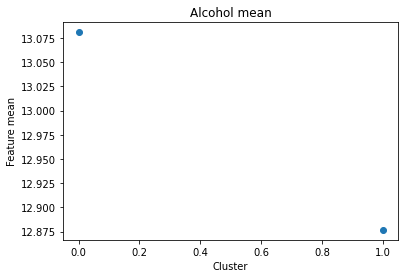

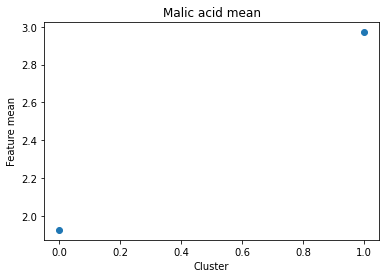

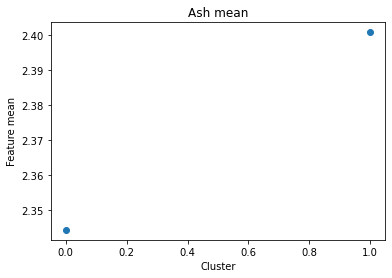

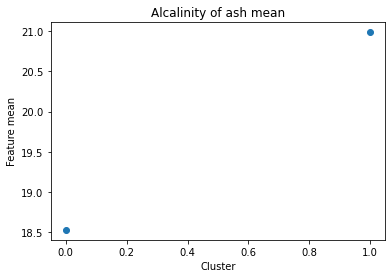

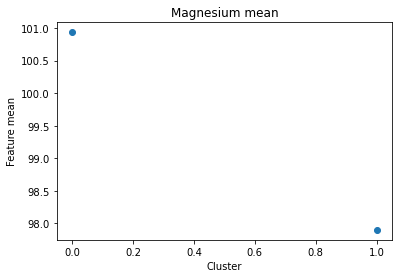

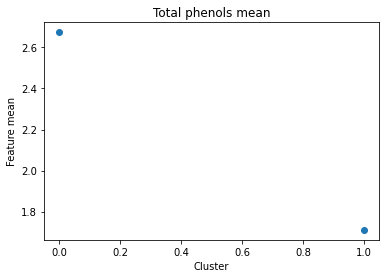

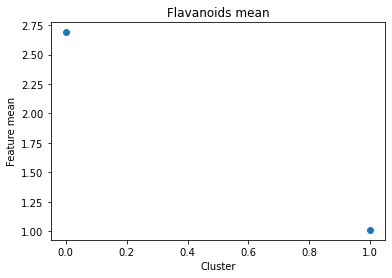

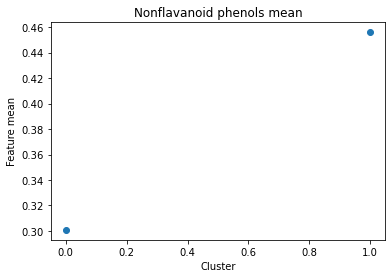

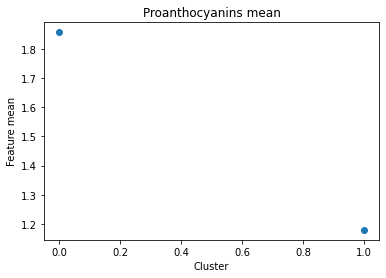

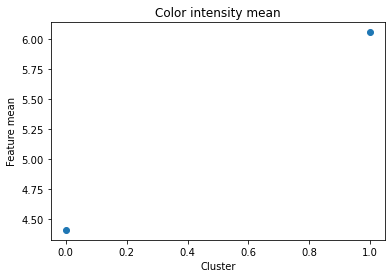

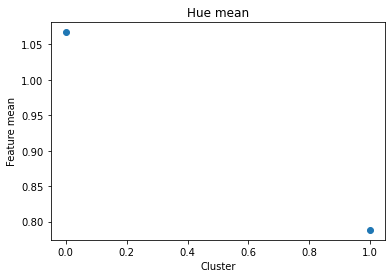

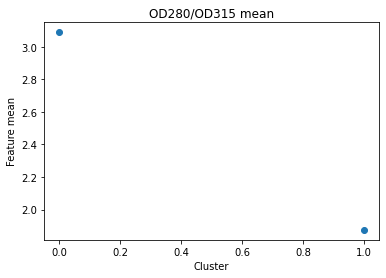

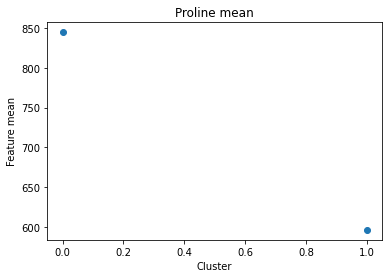

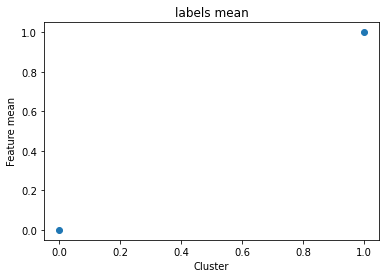

In [74]:
for col_to_comp in cols_to_compare:
    plt.figure()
    param_list = [cluster_description[col_to_comp][param_name] for cluster_description in cluster_desc]
    plt.scatter(list(range(len(param_list))), param_list)
    plt.xlabel('Cluster')
    plt.ylabel('Feature '+param_name)
    plt.title(col_to_comp + ' ' + param_name)

In [75]:
# Możemy zauważyć, że faktycznie klastry różnią się między sobą - najlepiej widoczne jest to w przypadku cech 
# malic acid (klaster 1 zawiera wina kwaśniejsze), total phenols (w klastrze 0 dużo wyższe), 
# flavanoids (klaster 0 wartości znacząco wyższe), color intensity (wina w klastrze 1 mają intensywniejsze kolory),
# proline (wyższe dla klastera 0). Najprawdopodobniej cechy te wpływają na smak wina.

In [76]:
# Na koniec spróbujmy podzielić dane na 3 klastry i zobaczmy co wyjdzie (porównanie z oryginalną kolumną Wines)

In [77]:
# Utwórzmy więc model z 3 klastrami
K_mean = KMeans(n_clusters=3)
K_mean.fit(df_scaled)

KMeans(n_clusters=3)

In [78]:
# Zestawienie z rzeczywistą ramką danych

In [79]:
# Wczytajmy znów dane, ale nie usuwamy kolumny Wines
df_complete = pd.read_csv('wine.data', names=columns, sep=',')

labels = pd.DataFrame(K_mean.labels_)
labeledData = pd.concat((df_complete, labels), axis = 1)
labeledData = labeledData.rename({0:'labels'},axis=1)

In [81]:
labeledData

,Wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline,labels
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [86]:
# Zobaczmy jak przebiegły wyniki grupowania
labeledData['labels'].value_counts()

0    63
1    60
2    55
Name: labels, dtype: int64

In [87]:
labeledData['Wine'].value_counts()

2    71
1    59
3    48
Name: Wine, dtype: int64

In [89]:
# Klastry zawierają podobne liczby danych (są oczywiście inaczej indeksowane, ale mogą dotyczyć tych samych danych)

In [91]:
# Zobaczmy zawartość określonych klastrów w odniesieniu do rzeczywistości (kolumna Wine)

In [92]:
for cluster_no in range(3):
    print("Cluster "+str(cluster_no))
    print(labeledData[labeledData['labels']==cluster_no]['Wine'].value_counts())

Cluster 0
2    62
1     1
Name: Wine, dtype: int64
Cluster 1
1    58
2     2
Name: Wine, dtype: int64
Cluster 2
3    48
2     7
Name: Wine, dtype: int64


In [90]:
# Dodatkowo przeprowadźmy wizualizację. Wizualizacja pomoże wskazać zawartość poszczególnych klastrów - wybierzmy 
# dwie dowolne cechy i pokażmy przynależność do określonych klastrów

<AxesSubplot:title={'center':'Original data - wine column'}, xlabel='Alcohol', ylabel='Ash'>

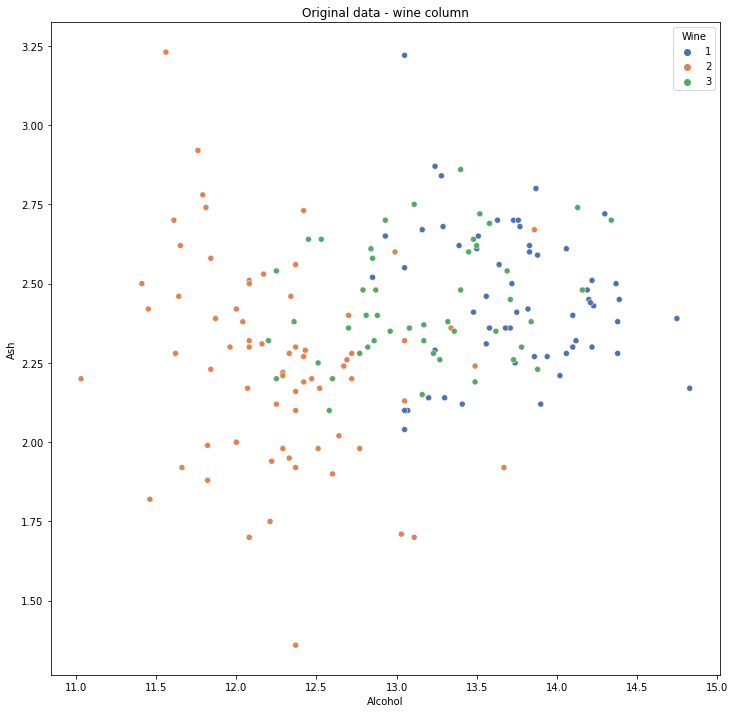

In [117]:
plt.figure(figsize=(12,12))
plt.title('Original data - wine column')
sns.scatterplot(x="Alcohol", y="Ash", data=labeledData, hue="Wine", palette="deep")

<AxesSubplot:title={'center':'Data labeled with KMeans - Labels column'}, xlabel='Alcohol', ylabel='Ash'>

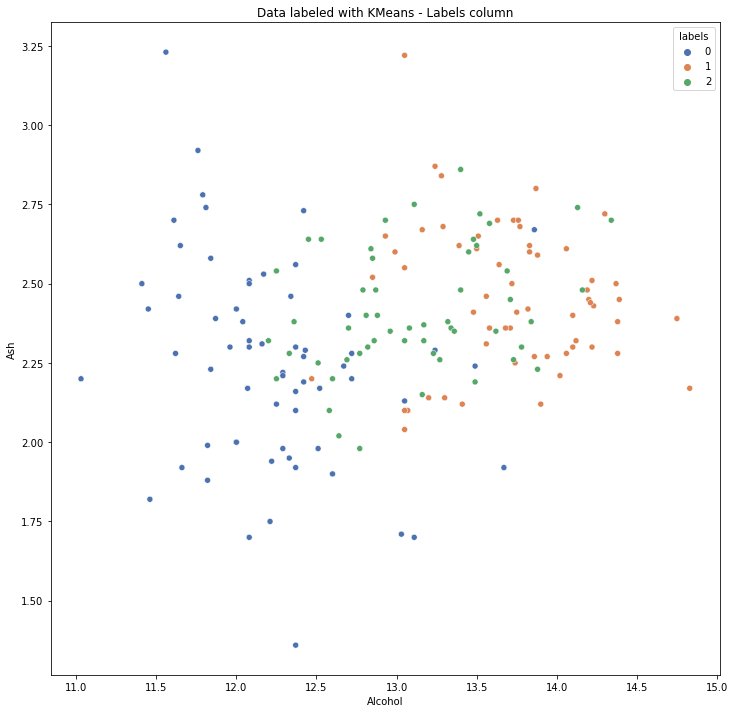

In [118]:
plt.figure(figsize=(12,12))
plt.title('Data labeled with KMeans - Labels column')
sns.scatterplot(x="Alcohol", y="Ash", data=labeledData, hue="labels", palette="deep")

In [120]:
# Jak widać, kolejność klastrów dla KMeans jest zamieniona - zawartość poszczególnych jest jednak bardzo zbliżona 
# z oryginalnymi danymi. KMeans dla trzech klastrów pozwala na wyznaczenie podziału zgodnego z kolumną "Wine" 
# z oryginalnych danych.